# Titanic Dataset


* PreProccess

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

In [4]:
data_train = pd.read_csv('Input\T_train.csv')
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data_train.replace(['female','male'], [0, 1], inplace=True)
data_train.fillna(0, inplace=True)
data_train.head(10)

C:\Users\Royal Center\AppData\Local\Temp\ipykernel_13112\3252267291.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_train.replace(['female','male'], [0, 1], inplace=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,S
5,6,0,3,"Moran, Mr. James",1,0.0,0,0,330877,8.4583,0,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,0,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,0,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,0,C


In [6]:
X_train = np.array(data_train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']])
y_train = np.array(data_train[['Survived']])

# *Model*

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(6, activation='sigmoid'), # input
    tf.keras.layers.Dense(20, activation='relu'), # hidden 1
    tf.keras.layers.Dense(8, activation='sigmoid'), # hidden 2
    tf.keras.layers.Dense(2, activation='softmax') # output
])

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
output = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6258 - loss: 0.6643
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6298 - loss: 0.6406
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6464 - loss: 0.6295
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6244 - loss: 0.6335
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6460 - loss: 0.6413
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6464 - loss: 0.6207
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6816 - loss: 0.6234
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6611 - loss: 0.6321
Epoch 9/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6700 - loss: 0.6372
Epoch 10/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6649 - loss: 0.6399
Epoch 11/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6786 - loss: 0.6108
Epoch 12/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy

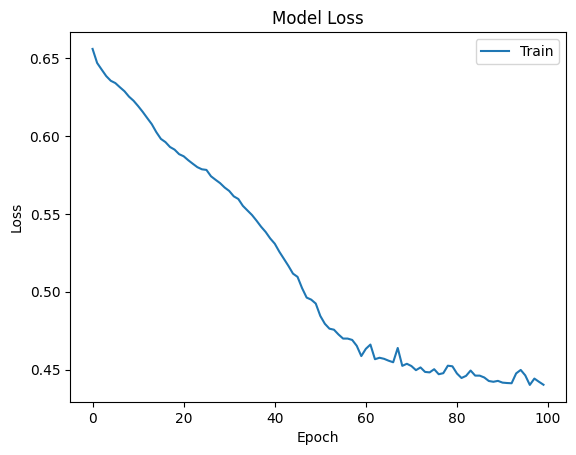

In [10]:
plt.plot(output.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

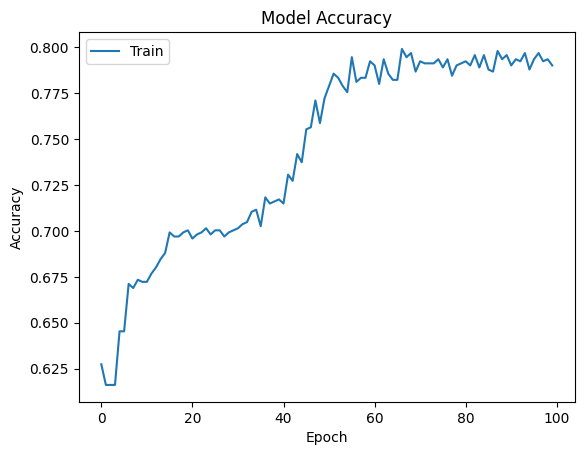

In [11]:
plt.plot(output.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [12]:
data_test = pd.read_csv('Input\T_test.csv')
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [13]:
data_test.replace(['female','male'], [0, 1], inplace=True)
data_test.fillna(0, inplace=True)
data_test.head(10)

C:\Users\Royal Center\AppData\Local\Temp\ipykernel_13112\1801875963.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_test.replace(['female','male'], [0, 1], inplace=True)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,0,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,0,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,0,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,0,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,0,S
5,897,3,"Svensson, Mr. Johan Cervin",1,14.0,0,0,7538,9.2250,0,S
6,898,3,"Connolly, Miss. Kate",0,30.0,0,0,330972,7.6292,0,Q
7,899,2,"Caldwell, Mr. Albert Francis",1,26.0,1,1,248738,29.0000,0,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,18.0,0,0,2657,7.2292,0,C
9,901,3,"Davies, Mr. John Samuel",1,21.0,2,0,A/4 48871,24.1500,0,S


In [14]:
data_target = pd.read_csv('Input\T_gender_submission.csv')
data_target.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [15]:
X_test = np.array(data_test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']])
Y_test = np.array(data_target[['Survived']])

In [16]:
result = model.evaluate(X_test, Y_test)
print(f'Loss: {result[0]}')
print(f'Accuracy: {result[1]}')

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9398 - loss: 0.2840  
Loss: 0.27198103070259094
Accuracy: 0.9497607946395874


# Calculate **Precision** and **Recall**

In [17]:
y_pred = np.argmax(model.predict(X_test), axis=1)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [18]:
cm = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[259   7]
 [ 14 138]]


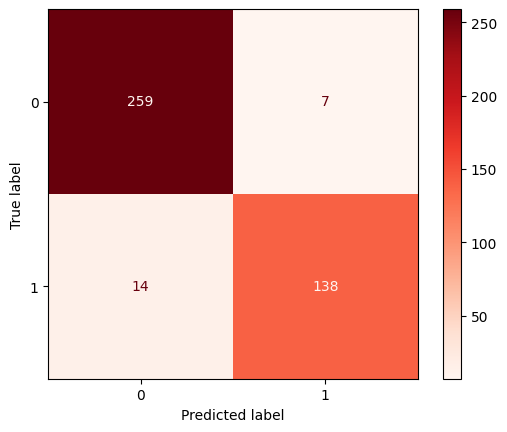

In [19]:
displiay_cm = ConfusionMatrixDisplay(confusion_matrix=cm)
displiay_cm.plot(cmap=plt.cm.Reds)
plt.show()

In [20]:
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')

Precision: 0.9517241379310345
Recall: 0.9078947368421053


# **Jack** and **Rose** survival prediction

In [21]:
jack = np.array([[3, 1, 20, 0, 0, 5]])
rose = np.array([[1, 0, 19, 1, 0, 100]])

In [22]:
jack_pred = np.argmax(model.predict(jack), axis=1)
rose_pred = np.argmax(model.predict(rose), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


In [23]:
print(f"Jack's survival prediction: {'Survived' if jack_pred == 1 else 'Did not survive'}")
print(f"Rose's survival prediction: {'Survived' if rose_pred == 1 else 'Did not survive'}")

Jack's survival prediction: Did not survive
Rose's survival prediction: Survived


# ***KNN***

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train.ravel())

# Predict & calculate accuracy
knn_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(Y_test, knn_pred)
print(f"KNN Accuracy: {knn_accuracy}")

KNN Accuracy: 0.6698564593301436


## ***Perceptron***

In [25]:
from sklearn.linear_model import Perceptron

# Perceptron model
perceptron = Perceptron()
perceptron.fit(X_train, y_train.ravel())

# Predict & calculate accuracy
perceptron_pred = perceptron.predict(X_test)
perceptron_accuracy = accuracy_score(Y_test, perceptron_pred)
print(f"Perceptron Accuracy: {perceptron_accuracy}")

Perceptron Accuracy: 0.7177033492822966


## Comparing the accuracy of **KNN**, **Perceptron** and **MLP Algorithms**

In [26]:
results = pd.DataFrame({
    'Algorithm': ['KNN', 'Perceptron', 'MLP (Multi-Layer Perceptron)'],
    'Accuracy': [knn_accuracy, perceptron_accuracy, result[1]]
})

results

,Algorithm,Accuracy
0,KNN,0.669856
1,Perceptron,0.717703
2,MLP (Multi-Layer Perceptron),0.949761
